In [37]:
import numpy as np
from ultralytics import YOLO
import cv2
import keras_ocr
import easyocr
import matplotlib.pyplot as plt


import torch
from torchvision import transforms
from models.experimental import attempt_load
from utils.general import *

In [38]:
img_path = "test_images/mybike.jpeg"

In [39]:
model = YOLO("best.pt")
char_model = YOLO("charecter_detection\\try1\\weights\\best.pt")

In [40]:
detections = model(img_path)[0]


image 1/1 e:\My Projects\Number Plate detection\test_images\mybike.jpeg: 480x640 1 Back Plate, 52.1ms
Speed: 15.7ms preprocess, 52.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


In [41]:
detections_ = []
for detection in detections.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    detections_.append([x1, y1, x2, y2, score])

[496.2803649902344, 315.0761413574219, 922.789306640625, 538.2984008789062, 0.703687846660614]


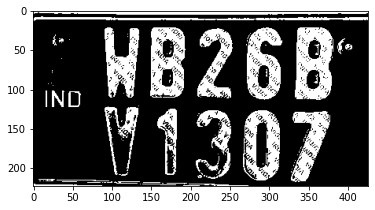

In [60]:

try:
    fls = detections_[0]
    print(fls)
    frame = cv2.imread(img_path)
    crop = frame[int(fls[1]):int(fls[3]), int(fls[0]):int(fls[2])]
    crop_gray=cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    # crop_gray =cv2.bitwise_not(crop_gray)
    ret, crop_gray_thresh = cv2.threshold(crop_gray, 127, 255, cv2.THRESH_BINARY_INV)


    ksize = (1, 1)
  
# Using cv2.blur() method 
    image = cv2.blur(crop_gray, ksize) 


    # reader = easyocr.Reader(['ch_sim','en'])
    plt.imshow(crop_gray_thresh, cmap="gray")
    # result = reader.readtext(image)
    # print(result)
except IndexError:
    print("Unable to Detect")


In [61]:
image2 = cv2.resize(image, (640, 640))
image2.shape

(640, 640)

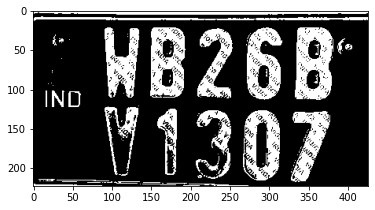

In [62]:
plt.imshow(crop_gray_thresh, cmap="gray")

In [63]:
cv2.imwrite("image.jpg", crop_gray)

True

In [64]:
char_detection = model(image2)[0]
char_detections_ = []
for detection in char_detection:
    # x1, y1, x2, y2, score, class_id = detection
    # char_detections_.append([x1, y1, x2, y2, score])

    print(detection)



ValueError: axes don't match array

In [ ]:
# mylist=list(result)
# mylist

In [ ]:
def contains_letters(s):
    return any(char.isalpha() for char in s)

def contains_numbers(s):
    return any(char.isdigit() for char in s)

In [ ]:
numbers= []
for i in mylist:
    my_string = i[1]
    last_four_letters = my_string[-4:]
    if contains_numbers(last_four_letters):
        if contains_letters(last_four_letters):
            pass
        else:
            numbers.append(last_four_letters)   

NameError: name 'mylist' is not defined

In [ ]:
numbers

['3376']

In [ ]:
text_img = frame

cv2.rectangle(text_img, (int(fls[0]), int(fls[1])), (int(fls[2]), int(fls[3])),(255,0,0), 10)
res_img = cv2.putText(text_img, str(numbers[0]) , (int(fls[0]), int(fls[1])), cv2.FONT_HERSHEY_SIMPLEX, 3, (36,255,12), 5)


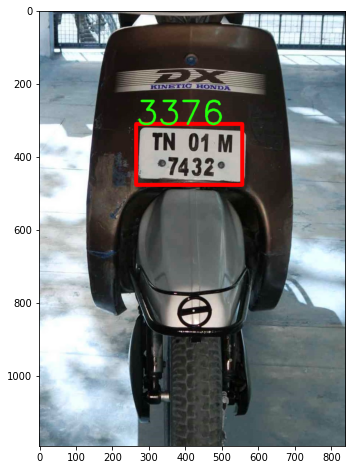

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(res_img)